# Edge detection using Sobel filter

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
img=plt.imread('image.png')

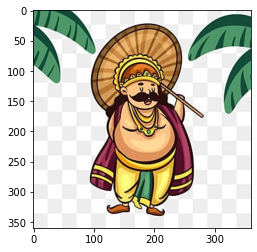

In [62]:
plt.imshow(img)


In [63]:
print(img)

[[[0.29411766 0.57254905 0.4       ]
  [0.33333334 0.6156863  0.43529412]
  [0.2901961  0.5803922  0.3882353 ]
  ...
  [0.93333334 0.93333334 0.93333334]
  [0.93333334 0.93333334 0.93333334]
  [0.9372549  0.9372549  0.9372549 ]]

 [[0.29803923 0.5764706  0.40392157]
  [0.32156864 0.6039216  0.42352942]
  [0.2901961  0.5803922  0.3882353 ]
  ...
  [0.9254902  0.9254902  0.9254902 ]
  [0.9254902  0.9254902  0.9254902 ]
  [0.9254902  0.9254902  0.9254902 ]]

 [[0.30588236 0.5921569  0.41568628]
  [0.30588236 0.5921569  0.4117647 ]
  [0.29803923 0.5882353  0.39607844]
  ...
  [0.9254902  0.9254902  0.9254902 ]
  [0.9254902  0.9254902  0.9254902 ]
  [0.9254902  0.9254902  0.9254902 ]]

 ...

 [[0.93333334 0.93333334 0.93333334]
  [0.93333334 0.93333334 0.93333334]
  [0.93333334 0.93333334 0.93333334]
  ...
  [0.93333334 0.93333334 0.93333334]
  [0.93333334 0.93333334 0.93333334]
  [0.93333334 0.93333334 0.93333334]]

 [[0.93333334 0.93333334 0.93333334]
  [0.93333334 0.93333334 0.93333334]


In [64]:
horizontal_filter=[[-1,-2,-1],[0,0,0],[1,2,1]]
vertical_filter=[[-1,0,1],[-2,0,2],[-1,0,1]]

In [65]:
n,m,d=img.shape
print(img.shape)

(360, 360, 3)


In [66]:
vertical_edges_img=np.zeros_like(img)
horizontal_edges_img=np.zeros_like ( img )

In [67]:
for row in range(3,n-2):
    for col in range(3,m-2):
        local_pixels = img[row-1:row+2,col-1:col+2,0]

In [68]:
for row in range ( 3 , n - 2 ) :
    for col in range ( 3 , m - 2 ) :
        local_pixels = img [ row - 1 : row + 2 , col - 1 : col + 2 , 0 ]
        transformed_pixels = vertical_filter * local_pixels
        vertical_score = ( transformed_pixels.sum ( ) + 3 ) / 6
        vertical_edges_img [ row , col ] = [ vertical_score ] * 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


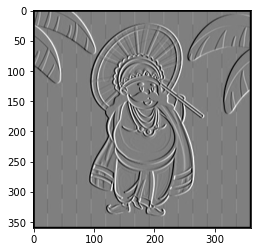

In [69]:
plt.imshow ( vertical_edges_img )

In [70]:
horizontal_edges_img=np.zeros_like ( img )

In [71]:
for row in range ( 3 , n - 2 ) :
    for col in range ( 3 , m - 2 ) :
        local_pixels = img [ row - 1 : row + 2 , col - 1 : col + 2 , 0 ]
        transformed_pixels = horizontal_filter * local_pixels
        horizontal_score = ( transformed_pixels.sum ( ) + 3 ) / 6
        horizontal_edges_img [ row , col ] = [ horizontal_score ] * 3

In [72]:
horizontal_edges_img [ 170,224 ]

array([0.51241827, 0.51241827, 0.51241827], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


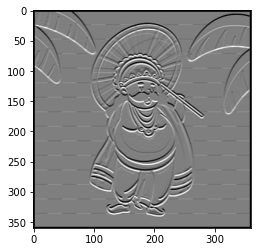

In [73]:
plt.imshow ( horizontal_edges_img )

In [74]:
edges_img = np.zeros_like ( img )

In [75]:
for row in range ( 3 , n - 2 ) :
    for col in range ( 3 , m - 2 ) :
        local_pixels = img [ row - 1 : row + 2 , col - 1 : col + 2 , 0 ]
        vertical_transformed_pixels = vertical_filter * local_pixels
        vertical_score = vertical_transformed_pixels.sum ( ) / 4
        horizontal_transformed_pixels = horizontal_filter * local_pixels
        horizontal_score = horizontal_transformed_pixels.sum ( ) / 4
        edge_score = ( vertical_score ** 2 + horizontal_score ** 2 )**0.5
        edges_img [ row , col ] = [ edge_score ] * 3
edges_img = edges_img / edges_img.max ( )

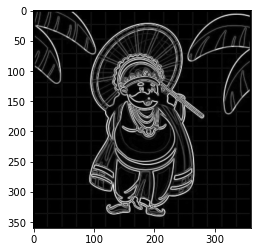

In [76]:
plt.imshow ( edges_img )